In [6]:
import sympy.functions.special.gamma_functions as sy
import matplotlib.pyplot as plt
import math

Brief outline of derivation following Churchill+99:

$$ \frac{dN}{dX} = f_R(L) \frac{c \sigma n}{H_0} $$

The 'column density' $n\sigma$ is given by

$$ n \sigma = \pi \int_{L_\text{min}}^\infty \Phi(L) R^2(L) dL $$

$\Phi(L)$ and $R(L)$ are givan by a Schechter and a PL, respectively:

$$ \Phi(L) dL = \Phi^* (L/L^*)^\alpha \text{exp} (-L/L^*) dL$$
$$ R(L) = R^* (L/L^*)^\beta $$

Grouping together:

$$ n \sigma = \pi \int_{L_\text{min}}^\infty \Phi^* R^{*^2} (L/L^*)^{\alpha+2\beta} \text{exp} (-L/L^*)dL $$
$$ = \pi \Phi^* R^{*^2} \Gamma(\alpha+2\beta+1 , L_\text{min}/L^*) $$

And finally

$$ \frac{dN}{dX} = f_R(L)\frac{c \pi}{H_0} \Phi^* R^{*^2} \Gamma(\alpha+2\beta+1 , L_\text{min}/L^*) $$

and now only the $\Gamma$ function depends on $L_\text{min}$. 

# For z=5:

In [7]:
c = 3E8
H0 = 2.1916E-18
meters_to_kpc = 3.086E19


beta = 0.23
alpha = -1.75
R_star = 75.0*meters_to_kpc
f_R = 0.84
phi_star = (10.0**(-3.12))/((1000.0*meters_to_kpc)**3.0)

In [8]:
gamma_arg = alpha+(2.0*beta)+1.0

In [9]:
l_ratio = [0.001,0.005,0.01,0.03,0.06,0.1,0.2,0.5,0.6,0.7,1.0,1.5]
dNdX = [0]*len(l_ratio)

In [11]:
for i in range(len(l_ratio)):
    dNdX[i] = (c*math.pi/H0)*f_R*(R_star**2)*phi_star*sy.uppergamma(gamma_arg,l_ratio[i])

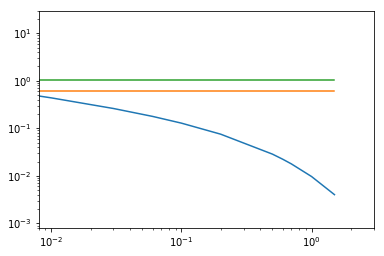

In [12]:
a=[0.8-0.18]*len(l_ratio)
b=[0.86+0.19]*len(l_ratio)
plt.plot(l_ratio,dNdX,l_ratio,a,l_ratio,b)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0008,30)
plt.xlim(0.008,3.0)
plt.show()